In [ ]:
import csv
import requests


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=IBM&interval=15min&slice=year1month1&apikey=843PD23E2T5O7HV'
# CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=RELIANCE.BSE&interval=15min&sluce=year1month1apikey=843PD23E2T5O7HV'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    stock = list(cr)
    print(stock)
    # print(my_list)
    # for row in my_list:
    #     print(row)

[['time', 'open', 'high', 'low', 'close', 'volume'], ['2023-05-10 19:45:00', '121.91', '121.91', '121.91', '121.91', '175'], ['2023-05-10 19:15:00', '122.02', '122.02', '122.02', '122.02', '467'], ['2023-05-10 18:30:00', '122.02', '122.02', '122.02', '122.02', '100'], ['2023-05-10 17:45:00', '122.02', '122.02', '122.02', '122.02', '113'], ['2023-05-10 17:30:00', '122.1', '122.1', '122.1', '122.1', '613'], ['2023-05-10 17:15:00', '122.02', '122.02', '122.02', '122.02', '786'], ['2023-05-10 17:00:00', '122.0', '122.0', '122.0', '122.0', '510'], ['2023-05-10 16:45:00', '122.12', '122.12', '122.12', '122.12', '100'], ['2023-05-10 16:30:00', '122.14', '122.14', '122.14', '122.14', '105'], ['2023-05-10 16:15:00', '122.02', '122.02', '122.02', '122.02', '57182'], ['2023-05-10 16:00:00', '122.3', '122.49', '122.0', '122.02', '559475'], ['2023-05-10 15:45:00', '122.2325', '122.4475', '122.2', '122.31', '177790'], ['2023-05-10 15:30:00', '121.98', '122.34', '121.96', '122.24', '99442'], ['2023-0

All libraries loaded
Number data points: 5919 from 1999-11-01 to 2023-05-10


<ipython-input-62-fa8d244318c4>:86: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


image__saving


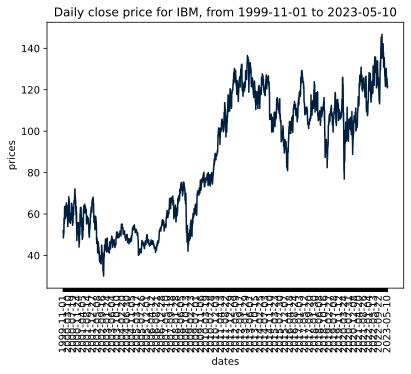

In [ ]:
#@title Load Python libraries

! pip install alpha_vantage -q

# pip install numpy
import numpy as np

# pip install matplotlib
import matplotlib.pyplot as plt
from google.colab import files
# downloading the image
# import matplotlib.pyplot as plt
# from google.colab import files

# test = plt.figure()
# plt.plot([[1, 2, 3], [5, 2, 3]])
# plt.figure(figsize=(50,50))
# test.show()

# test.savefig('samplefigure.png') files.download('samplefigure.png')

# pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

print("All libraries loaded")


config = {
    "alpha_vantage": {
        "key": "843PD23E2T5O7HV",
        "symbol": "IBM",
        "outputsize": "full",
        "key_adjusted_close": "5. adjusted close",
    },
    "data": {
        "window_size": 20,
        "train_split_size": 0.80,
    },
    "plots": {
        "show_plots": True,
        "xticks_interval": 90,
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    },
    "model": {
        "input_size": 1, # since we are only using 1 feature, close price
        "num_lstm_layers": 2,
        "lstm_size": 32,
        "dropout": 0.2,
    },
    "training": {
        "device": "cpu", # "cuda" or "cpu"
        "batch_size": 64,
        "num_epoch": 100,
        "learning_rate": 0.01,
        "scheduler_step_size": 40,
    }
}




def download_data(config, plot=False):
    # get the data from alpha vantage

    ts = TimeSeries(key=config["alpha_vantage"]["key"])
    data, meta_data = ts.get_daily_adjusted(config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])

    data_date = [date for date in data.keys()]
    data_date.reverse()

    data_close_price = [float(data[date][config["alpha_vantage"]["key_adjusted_close"]]) for date in data.keys()]
    data_close_price.reverse()
    data_close_price = np.array(data_close_price)

    num_data_points = len(data_date)
    display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points-1]
    print("Number data points:", num_data_points, display_date_range)

    if plot:
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('svg')
        # fig = figure(figsize=(20, 5))
        # fig.patch.set_facecolor((1.0, 1.0, 1.0))

        plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
        xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
        x = np.arange(0,len(xticks))
        plt.xticks(x, xticks, rotation='vertical')
        plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
        plt.xlabel('dates')
        plt.ylabel('prices')
        # plt.grid(b=None, which='major', axis='y', linestyle='--')
        # fig.savefig('samplefigure.png')
        # files.download('samplefigure.png')
        plt.savefig('sample_stock.png')
        print('image__saving')
        plt.show()

    return data_date, data_close_price, num_data_points, display_date_range

data_date, data_close_price, num_data_points, display_date_range = download_data(config, plot=config["plots"]["show_plots"])

In [ ]:
plt.savefig('sample_stock2.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np


In [ ]:
# international dataset

import pandas as pd
data = pd.DataFrame(stock)
data.head()


,0,1,2,3,4,5
0,time,open,high,low,close,volume
1,2023-05-10 19:45:00,121.91,121.91,121.91,121.91,175
2,2023-05-10 19:15:00,122.02,122.02,122.02,122.02,467
3,2023-05-10 18:30:00,122.02,122.02,122.02,122.02,100
4,2023-05-10 17:45:00,122.02,122.02,122.02,122.02,113


In [ ]:
data.columns = ['time','open','high','low','close','volume']

In [ ]:
data.drop(0)


,time,open,high,low,close,volume
1,2023-05-10 19:45:00,121.91,121.91,121.91,121.91,175
2,2023-05-10 19:15:00,122.02,122.02,122.02,122.02,467
3,2023-05-10 18:30:00,122.02,122.02,122.02,122.02,100
4,2023-05-10 17:45:00,122.02,122.02,122.02,122.02,113
5,2023-05-10 17:30:00,122.1,122.1,122.1,122.1,613
...,...,...,...,...,...,...
908,2023-04-11 09:00:00,131.2,131.2,131.2,131.2,100
909,2023-04-11 08:15:00,130.72,130.72,130.72,130.72,257
910,2023-04-11 07:00:00,131.35,131.36,131.35,131.36,570
911,2023-04-11 06:00:00,131.6,131.6,131.58,131.59,1264


In [ ]:
from sklearn.preprocessing import StandardScaler
df = data.drop('time',axis =1)

In [ ]:
df = df.drop(0,axis = 0)

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df = df.astype({"open":"float","high":"float","low":"float","close":"float","volume":"float"})


<Axes: >

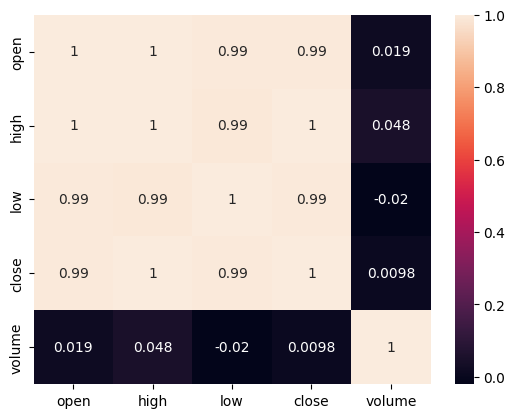

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

In [ ]:
deal = (df['open'] - df['close'] )*df['volume']

In [ ]:
df['deal'] = deal

In [ ]:
label = []
for i in deal:
  if i >-1:
    label.append(1)
  else:
    label.append(0)

In [ ]:
df['label'] = label

<Axes: >

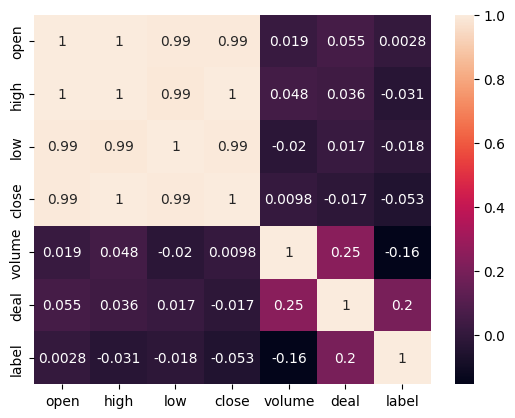

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
y = df['label']
x = df.drop('label',axis = 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16, return_sequences=True)),
  tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.Huber(),metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 25)

Epoch 1/25
23/23 [==============================] - 9s 14ms/step - loss: 0.1080 - accuracy: 0.6536
Epoch 2/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0761 - accuracy: 0.8665
Epoch 3/25
23/23 [==============================] - 0s 14ms/step - loss: 0.0515 - accuracy: 0.9047
Epoch 4/25
23/23 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.9394
Epoch 5/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.9177
Epoch 6/25
23/23 [==============================] - 0s 14ms/step - loss: 0.0326 - accuracy: 0.9209
Epoch 7/25
23/23 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 0.9033
Epoch 8/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0291 - accuracy: 0.9310
Epoch 9/25
23/23 [==============================] - 0s 20ms/step - loss: 0.0281 - accuracy: 0.9483
Epoch 10/25
23/23 [==============================] - 1s 26ms/step - loss: 0.0395 - accuracy: 0.8768
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, None, 32)          192       
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 64)         12672     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 32)         7872      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.save('mymodel.h5')

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 4ms/step


In [ ]:
print(np.shape(x_test))
print(np.shape(y_pred))

(183, 6)
(183, 6, 1)


In [ ]:
type(y_pred)

numpy.ndarray

<ipython-input-87-7d4958d34def>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


<Figure size 2000x400 with 0 Axes>

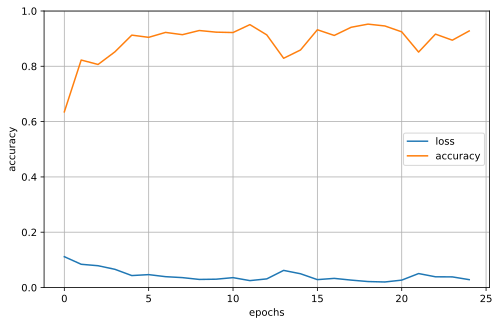

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
import numpy as np
close = np.array(df['close'])
y_pred = y_pred.flatten()
# print(max(close))

# Calculate the scaling factor
scale_factor = (max(close))/ max(y_pred)

# Scale the predictions to match the original stock prices
scaled_predictions = y_pred * scale_factor

# Convert the predictions to a list of prices
predicted_prices = np.array(scaled_predictions.tolist())[0]
print(predicted_prices)


2.955282211303711
